Day 6 - doing option pricing today, and we still use the simulators we defined earlier, but now we use a pricing model which uses the Monte Carlo estimate (and we also use Black Scholes price calculation, for european options)

Black-Scholes Analytical Price: 8.02135
 Paths:      100, MC Price: 7.81594, Error: 0.20541, Time: 0.001s
 Paths:      500, MC Price: 7.65333, Error: 0.36803, Time: 0.006s
 Paths:     1000, MC Price: 8.54527, Error: 0.52392, Time: 0.002s
 Paths:     5000, MC Price: 8.08018, Error: 0.05883, Time: 0.043s
 Paths:    10000, MC Price: 8.08201, Error: 0.06066, Time: 0.084s
 Paths:    50000, MC Price: 8.02083, Error: 0.00052, Time: 0.395s
 Paths:   100000, MC Price: 8.15514, Error: 0.13379, Time: 0.943s
 Paths:   500000, MC Price: 7.98897, Error: 0.03238, Time: 7.688s
 Paths:  1000000, MC Price: 8.02961, Error: 0.00826, Time: 13.955s
 Paths:  2000000, MC Price: 8.02491, Error: 0.00356, Time: 27.585s
 Paths:  3000000, MC Price: 8.01757, Error: 0.00378, Time: 42.109s


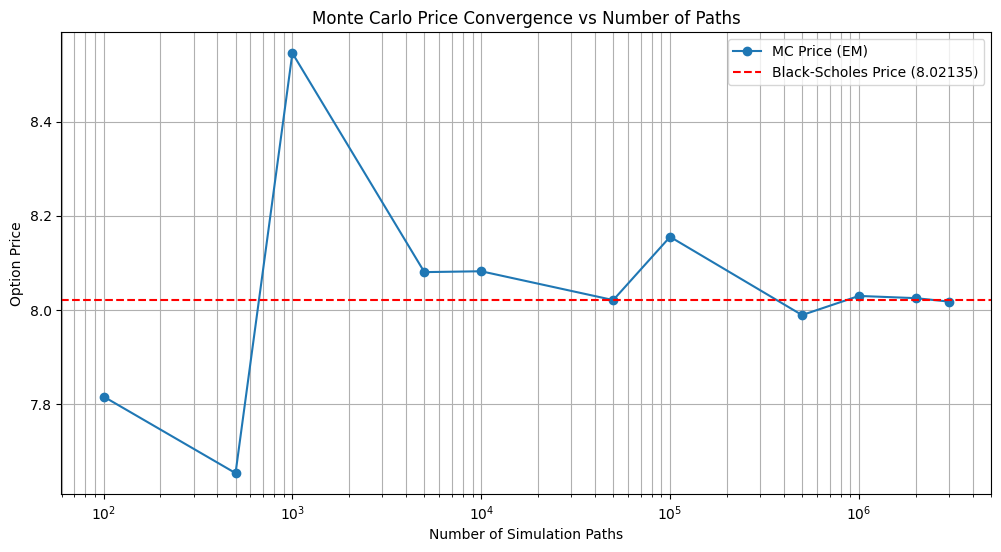

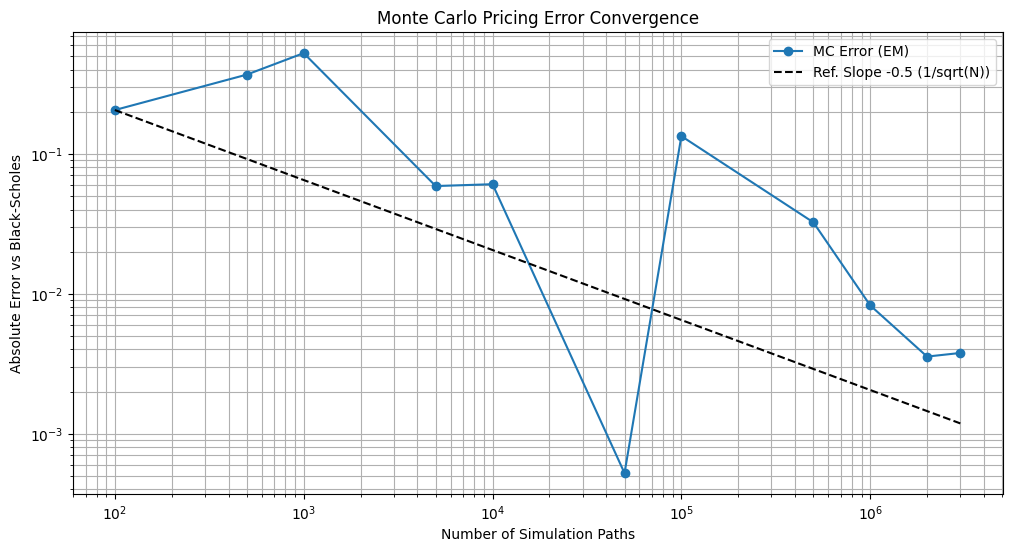

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os, time

notebook_dir = os.path.dirname(os.path.abspath("__file__"))
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))
src_path = os.path.join(project_root, 'src')
if src_path not in sys.path:
    sys.path.append(src_path)

#importing simulation function here

from pricing import black_scholes_call, price_european_option_mc

#parameters
S0 = 100.0     #initial stock price
K = 105.0      #strike price (slightly out-of-the-money)
R = 0.05       #risk-free rate (5% annual)
SIGMA = 0.20   #volatility (20% annual)
T = 1.0        #time to expiration (1 year)
DT = 0.004     #time step (daily, 1/252)

#calculation of the Black Scholes price
bs_price = black_scholes_call(S0, K, R, SIGMA, T)
print(f"Black-Scholes Analytical Price: {bs_price:.5f}")

#MC run with increasng number of paths, and we'll check time it takes on every run
path_counts = np.array([100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 2000000, 3000000]) #we don't add more because it takes time :')
mc_prices_em = np.zeros(len(path_counts))
mc_times_em = np.zeros(len(path_counts))
mc_errors_em = np.zeros(len(path_counts))

for i, num_paths in enumerate(path_counts):
    start_time = time.time()
    mc_prices_em[i] = price_european_option_mc(S0, K, R, SIGMA, T, DT, num_paths, option_type='call', scheme='EM')
    end_time = time.time()
    mc_times_em[i] = end_time - start_time
    mc_errors_em[i] = np.abs(mc_prices_em[i] - bs_price)
    print(f" Paths: {num_paths:8d}, MC Price: {mc_prices_em[i]:.5f}, Error: {mc_errors_em[i]:.5f}, Time: {mc_times_em[i]:.3f}s")

#MC price convergence plot
plt.figure(figsize=(12, 6))
plt.plot(path_counts, mc_prices_em, 'o-', label='MC Price (EM)')
plt.axhline(bs_price, color='red', linestyle='--', label=f'Black-Scholes Price ({bs_price:.5f})')
plt.title('Monte Carlo Price Convergence vs Number of Paths')
plt.xlabel('Number of Simulation Paths')
plt.ylabel('Option Price')
plt.xscale('log')
plt.grid(True, which='both')
plt.legend()
plt.show()

#MC error convergence plot
plt.figure(figsize=(12, 6))
plt.plot(path_counts, mc_errors_em, 'o-', label='MC Error (EM)')

#reference
plt.plot(
    path_counts, 
    mc_errors_em[0] * (path_counts[0] / path_counts)**0.5, 
    'k--', 
    label='Ref. Slope -0.5 (1/sqrt(N))'
)

plt.title('Monte Carlo Pricing Error Convergence')
plt.xlabel('Number of Simulation Paths')
plt.ylabel('Absolute Error vs Black-Scholes')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both')
plt.legend()
plt.show()